In [5]:
from hume import HumeBatchClient # Import the HumeBatchClient class from the hume package
from hume.models.config import ProsodyConfig # Import the ProsodyConfig class from the hume package
import os # Import the os module

# Create a client with your API key
client = HumeBatchClient("BvwDPKJ6eevK678fTrO0rQE39eamDj9HbxkNN2mjtvVLLnAo") 
urls = ["https://github.com/S-abk/Dual/raw/main/hume_test.mp3"] # You can add multiple URLs here
configs = [ProsodyConfig(identify_speakers=True, granularity="sentence")] # You can add multiple configs here
job = client.submit_job(urls, configs) # Submit the job

print(job) # Print the job object
print("Running...")

job.await_complete() # Wait for the job to complete



# Get the current directory
current_dir = os.getcwd() # Get the current directory

# Create the full path for the file
file_path = os.path.join(current_dir, "predictions.json") 

data = job.download_predictions(file_path) # Download the predictions to the file path

print("Predictions downloaded to predictions.json") 

# job.download_artifacts("artifacts.zip")
# print("Artifacts downloaded to artifacts.zip")

Job(id="1491572a-d7cd-4e8b-850a-5a70c69446e0")
Running...
Predictions downloaded to predictions.json


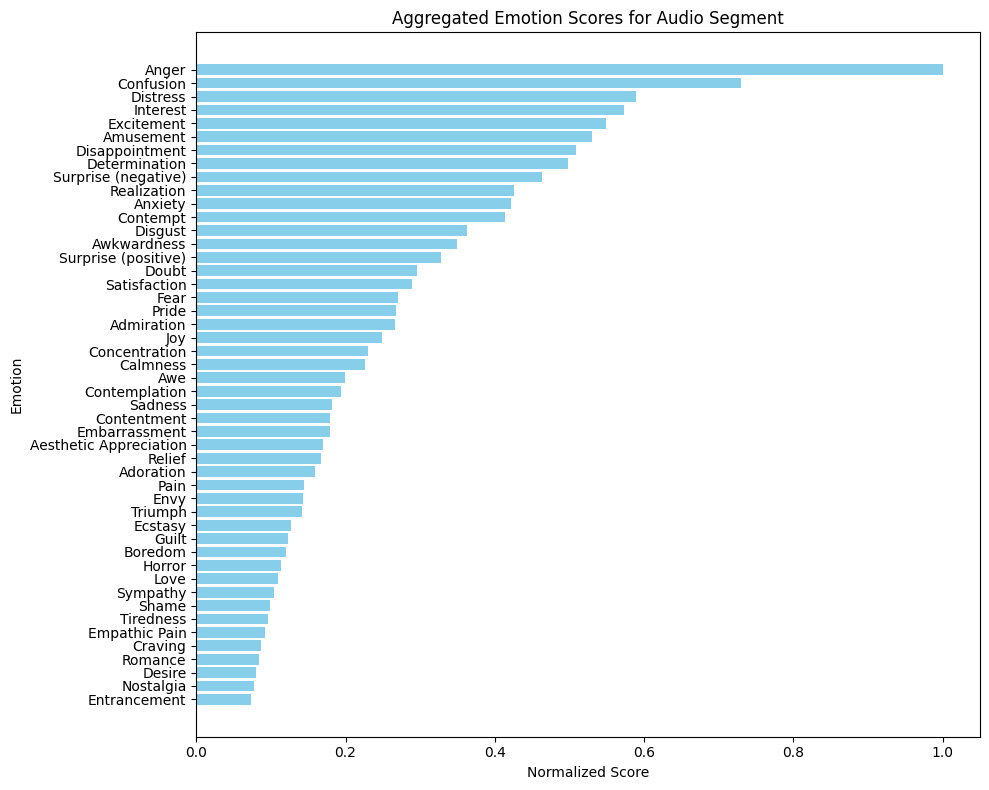

In [7]:
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import pandas as pd # Import the pandas library for data manipulation
import json # Import the json library for working with JSON data

with open('predictions.json') as f: # Load the JSON data
    data = json.load(f)


# Assuming 'data' is a variable that holds your loaded JSON data
segment = data[0]['results']['predictions'][0]['models']['prosody']['grouped_predictions'][0]['predictions'] # Get the prosody predictions for the first segment

# Initialize an empty dictionary to aggregate emotions
emotion_aggregate = {}

# Loop through each prediction to aggregate emotion scores
for prediction in segment: # Loop through each prediction
    for emotion in prediction['emotions']: # Loop through each emotion in the prediction
        if emotion['name'] in emotion_aggregate: # If the emotion is already in the dictionary, add the score
            emotion_aggregate[emotion['name']] += emotion['score'] # Add the score to the existing score
        else:
            emotion_aggregate[emotion['name']] = emotion['score'] # If the emotion is not in the dictionary, set the score

# Convert the aggregated emotions and scores to a DataFrame
emotion_df = pd.DataFrame(list(emotion_aggregate.items()), columns=['Emotion', 'Score']) # Convert the dictionary to a DataFrame

# Normalize the scores for better visualization
emotion_df['Score'] = emotion_df['Score'] / emotion_df['Score'].max()

# Sorting and plotting
emotion_df = emotion_df.sort_values('Score', ascending=True) # Sort the DataFrame by the scores in ascending order 
plt.figure(figsize=(10, 8)) # Set the figure size for the plot
plt.barh(emotion_df['Emotion'], emotion_df['Score'], color='skyblue') # Create a horizontal bar plot with the emotion names and scores as the x and y values 
plt.xlabel('Normalized Score') # Set the x-axis label 
plt.ylabel('Emotion') # Set the y-axis label
plt.title('Aggregated Emotion Scores for Audio Segment') # Set the title of the plot
plt.tight_layout() # Adjust the plot to make it more compact
plt.show() # Display the plot


- Sorting the emotions from least to most intense helps in quickly identifying the most prominent emotions.

- The scores are normalized, which standardizes the results and makes it easier to compare intensity.